In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [8]:

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


In [13]:
print((x_train, y_train),(x_test, y_test))


(array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
       

In [9]:
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)


In [14]:
print("Training model WITHOUT data augmentation...")
model_no_aug = build_cnn_model()
history_no_aug = model_no_aug.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)


Training model WITHOUT data augmentation...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2355 - loss: 19.7981 - val_accuracy: 0.4263 - val_loss: 1.6284
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5041 - loss: 1.4274 - val_accuracy: 0.4645 - val_loss: 1.5187
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6068 - loss: 1.1212 - val_accuracy: 0.4808 - val_loss: 1.5623
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6935 - loss: 0.8887 - val_accuracy: 0.4870 - val_loss: 1.6084
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7654 - loss: 0.6862 - val_accuracy: 0.4971 - val_loss: 1.7603
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8226 - loss: 0.5277 - val_accuracy: 0.5036 - val_loss: 1.9365
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8662 - loss: 0.4001 - val_accuracy: 0.4923 - val_loss: 2.2221
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step

In [15]:
print("\nTraining model WITH data augmentation...")
model_with_aug = build_cnn_model()
history_with_aug = model_with_aug.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    validation_data=(x_test, y_test_cat),
    steps_per_epoch=len(x_train) // 64,
    epochs=10,
    verbose=1
)


Training model WITH data augmentation...
Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.2153 - loss: 16.0756 - val_accuracy: 0.3779 - val_loss: 1.6887
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4531 - loss: 1.6155 - val_accuracy: 0.3810 - val_loss: 1.6847
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.3683 - loss: 1.7384 - val_accuracy: 0.4247 - val_loss: 1.5563
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4062 - loss: 1.6257 - val_accuracy: 0.4247 - val_loss: 1.5569
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.4148 - loss: 1.6178 - val_accuracy: 0.4482 - val_loss: 1.5226
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3125 - loss: 1.6602 - val_accuracy: 0.4524 - val_loss: 1.5165
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.4375 - loss: 1.5630 - val_accuracy: 0.4465 - val_loss: 1.5565
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step -

C:\Users\vatch\AppData\Local\Temp\ipykernel_4136\525758147.py:23: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


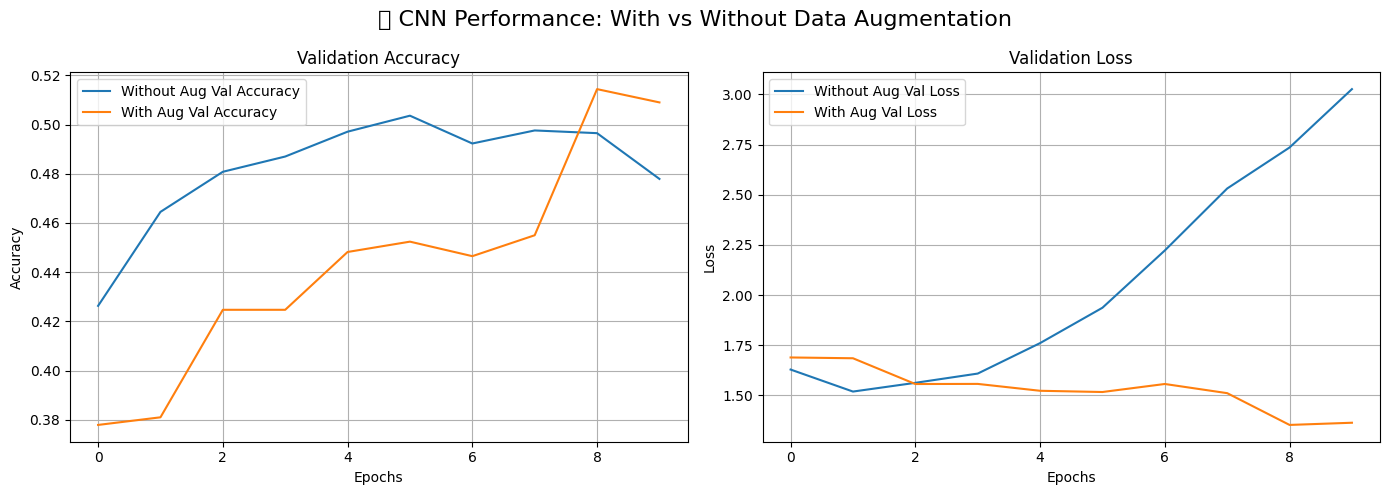

In [19]:
def plot_histories(hist1, hist2, label1='Without Aug', label2='With Aug'):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(hist1.history['val_accuracy'], label=f'{label1} Val Accuracy')
    plt.plot(hist2.history['val_accuracy'], label=f'{label2} Val Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(hist1.history['val_loss'], label=f'{label1} Val Loss')
    plt.plot(hist2.history['val_loss'], label=f'{label2} Val Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.suptitle("🔹 CNN Performance: With vs Without Data Augmentation", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_histories(history_no_aug, history_with_aug)

In [20]:

test_loss_no_aug, test_acc_no_aug = model_no_aug.evaluate(x_test, y_test_cat, verbose=0)
test_loss_aug, test_acc_aug = model_with_aug.evaluate(x_test, y_test_cat, verbose=0)

print(f"\n🔸 Test Accuracy WITHOUT Augmentation: {test_acc_no_aug:.4f}")
print(f"🔸 Test Accuracy WITH Augmentation   : {test_acc_aug:.4f}")


🔸 Test Accuracy WITHOUT Augmentation: 0.4796
🔸 Test Accuracy WITH Augmentation   : 0.5090
